In [6]:
import numpy as np
from pyESN import ESN
import Parity_Data_Generator
import matplotlib.pyplot as plt

# TODO create fast ESN
class fastESN():
    def __init__(self, randomState=np.random.RandomState(42)):
        self.fastESN = ESN(n_inputs=1,
                          n_outputs=1,
                          n_reservoir=500,                  # TODO tweak stuff
                          spectral_radius=0.95,
                          sparsity=0.95,
                          noise=0.001,
                          input_shift=0,
                          input_scaling=3,  # 3 seems to be fine. Maybe use lower
                          teacher_scaling=1.12, # 1.12
                          teacher_shift=-0.25,   # -0.7
                          out_activation=np.tanh,
                          inverse_out_activation=np.arctanh,
                          random_state=randomState,
                          silent=False)

    def fit(self, train, target):
#         print("Fast-fit", np.shape(train), np.shape(target))
        pred_train = self.fastESN.fit(train, target)

    def predict(self, input):
        return self.fastESN.predict(input)


In [7]:
## Testing ##
N = 10000   # number of datapoints
n = 3       # n-parity
# zeros = [1, 0, 1, 0, 1, 0]      # encoding for a zero
# ones =  [1, 1, 1, 0, 0, 0]      # encoding for a one
# bits, parity, target = Parity_Data_Generator.generateParityData(N, n, zero=zeros, one=ones)
bits, parity, target = Parity_Data_Generator.generateParityData(N, n)

In [8]:
# multiply each parity-element by length of encoding (6 default)
increased_parity = []
for p in parity:
    increased_parity = increased_parity + 8*[p]
increased_parity = np.array(increased_parity)
# print(len(increased_parity))
# traintest_cutoff = int(np.ceil(0.7 * N))
# train_parity, test_parity = parity[:traintest_cutoff], parity[traintest_cutoff:]
traintest_cutoff_targets = int(np.ceil(0.7*len(target)))
train_targets, test_targets, train_parity = target[:traintest_cutoff_targets], target[traintest_cutoff_targets:], increased_parity[:traintest_cutoff_targets]


In [9]:
targetESN = fastESN()
targetESN.fit(train_parity, train_targets)
predictedTargets = targetESN.predict(test_targets)
print("Test error")
print(np.sqrt(np.mean((predictedTargets-test_targets)**2)))


harvesting states...
fitting...
training error:
0.000987890299982
Test error
0.788368525843


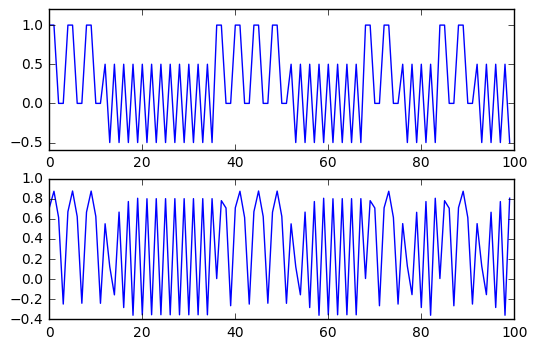

In [10]:
# Show Plots
plt.subplot(211)
plt.plot(test_targets[13500:13600])
plt.subplot(212)
plt.plot(predictedTargets[13500:13600])
plt.show()